# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [34]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [35]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [36]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [37]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 1898 rows and 9 columns. There is no missing data. 


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [38]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
delivery time is an integer, meaning that the time is rounded and may not be accurate.
rating is an object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [39]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There does not appear to be any missing values, all categories have 1898 non-null values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [40]:
# Write your code here
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Food_preparation time:
Min: 20 minutes
Average: 27.37 minutes
Max: 35 minutes



#### Observations:


### **Question 5:** How many orders are not rated?

In [41]:
# Write the code here
df["rating"].value_counts()


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations: 
736 ratings are not given.
Around 39% of total ratings are not given

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [42]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


<Axes: xlabel='count', ylabel='day_of_the_week'>

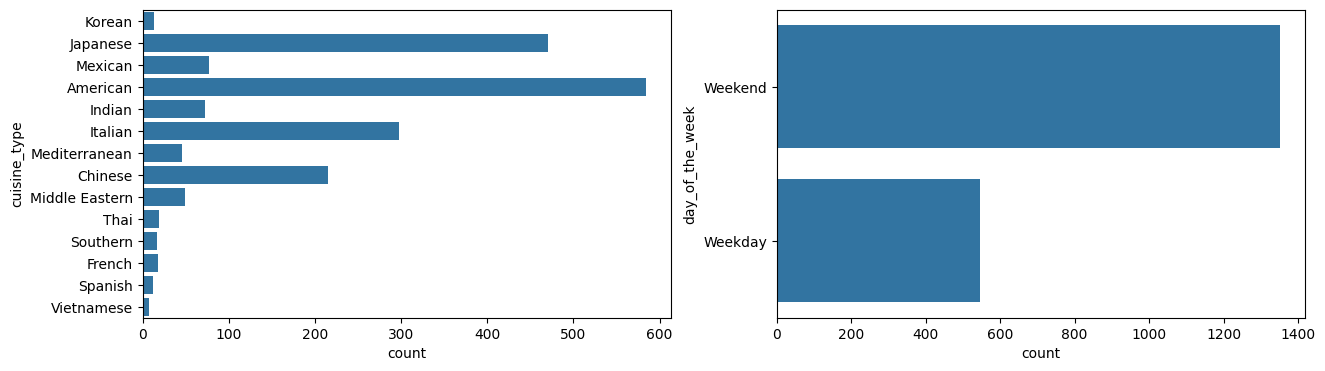

In [43]:
# Write the code here
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.countplot(data = df['cuisine_type'])

plt.subplot(1,2,2)
sns.countplot(data = df['day_of_the_week'])

<Axes: xlabel='count', ylabel='rating'>

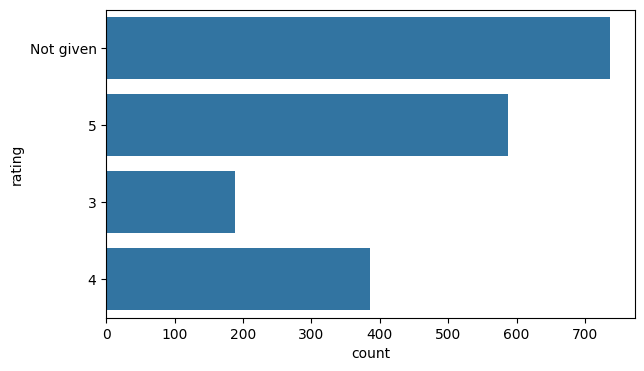

In [44]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.countplot(data = df['rating'])

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

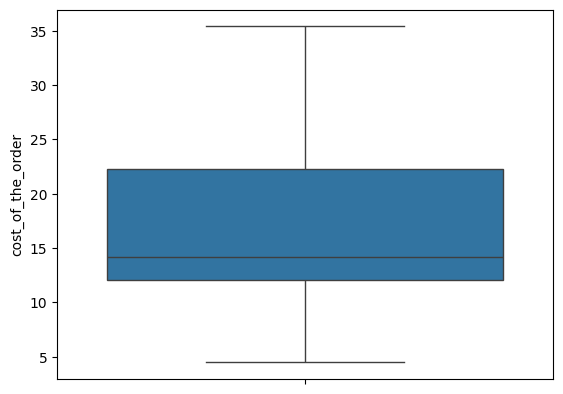

In [45]:
sns.boxplot(df['cost_of_the_order'])
df['cost_of_the_order'].describe()


In [46]:
IQR = 22.2975 - 12.08
bin_width = (2 * IQR) / np.cbrt(len(df))
bins = (df['cost_of_the_order'].max() - df['cost_of_the_order'].min()) / bin_width
bins

18.746106068811233

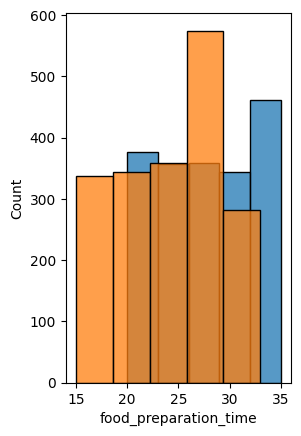

In [47]:
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'food_preparation_time', bins = 5)
sns.histplot(data = df, x = 'delivery_time', bins = 5)

df["total_time"] = df['delivery_time'] + df['food_preparation_time']
df["cost_per_minute"] = df['cost_of_the_order'] / df['total_time']


<Axes: xlabel='cost_of_the_order', ylabel='Count'>

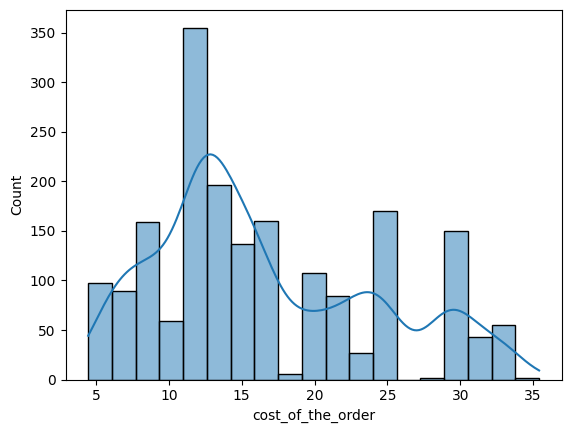

In [48]:
sns.histplot(data = df, x = 'cost_of_the_order', kde = True)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [49]:
# Write the code here
df["restaurant_name"].value_counts()


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations:
Top 5 restaurants are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends?

In [50]:
# Write the code here
popularity = df.groupby('day_of_the_week')['cuisine_type'].value_counts()
popularity


day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Mexican            24
                 Indian             24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Middle Eastern     32
                 Mediterranean      32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
American food is the most popular on weekends and also on weekdays.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [51]:
# Write the code here
count = df["cost_of_the_order"] > 20 #creates True False series if condition is met
over_20 = sum(count) #adds the number of True = 1 and False = 0 sum
percent = over_20 / len(count) * 100 #divide by total and multiply 100 to get percentage
percent

29.24130663856691

#### Observations:
29.24 percent of orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time?

In [52]:
# Write the code here
df["delivery_time"].mean()

24.161749209694417

#### Observations:
Mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [53]:
# Write the code here
frequency = df['customer_id'].value_counts() #finds the numbner of orders for each customer ID
frequency[0:3] #pulls the first 3 customers (3 most frequent)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

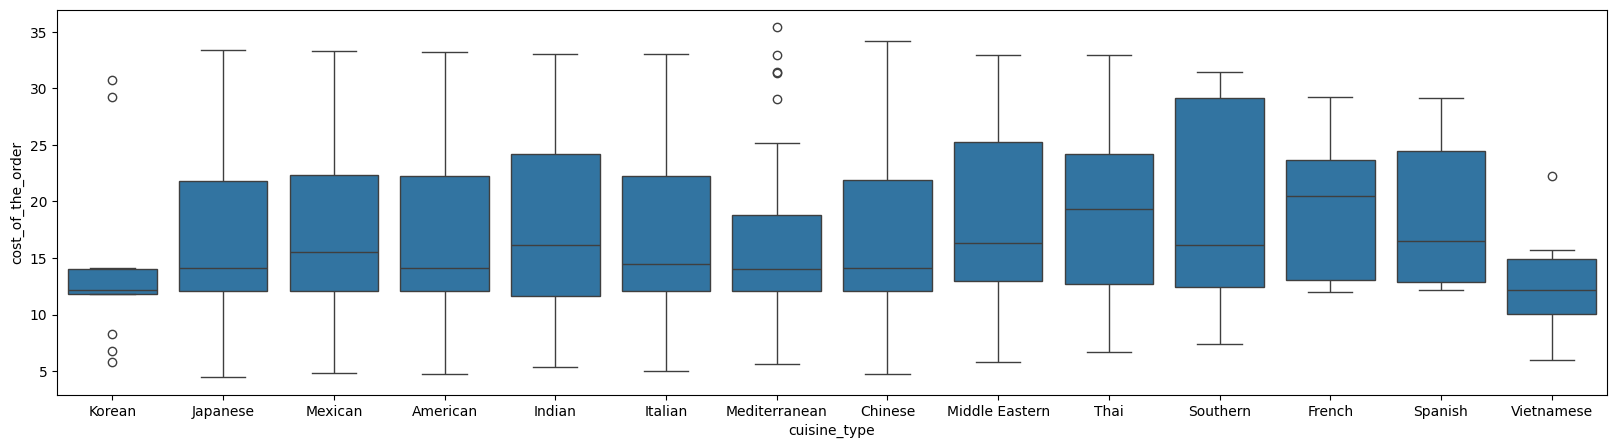

In [54]:
# Write the code here
plt.figure(figsize = (20,5))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
df['cuisine_type'].value_counts()


<Axes: xlabel='cost_of_the_order', ylabel='food_preparation_time'>

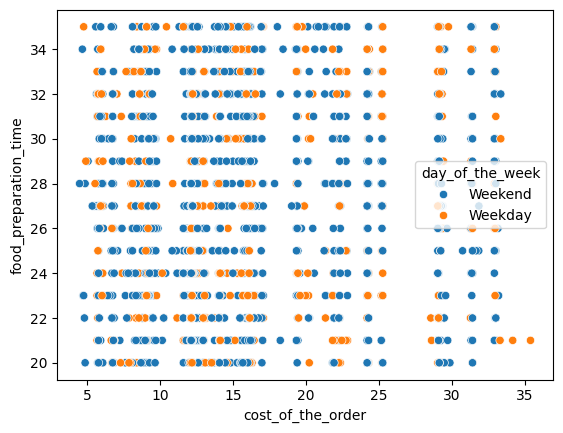

In [55]:
sns.scatterplot(data=df, x='cost_of_the_order', y='food_preparation_time', hue = 'day_of_the_week')

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

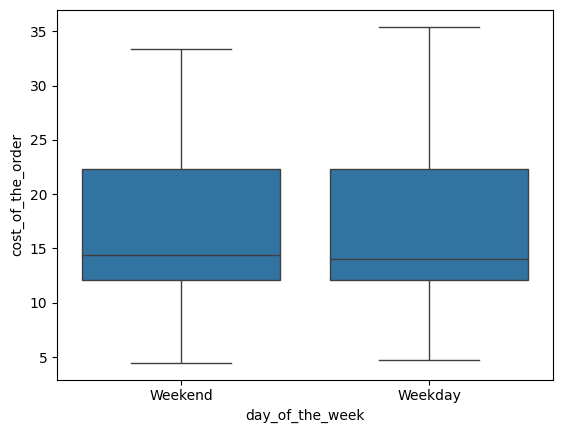

In [56]:
sns.boxplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order')


<Axes: xlabel='rating', ylabel='total_time'>

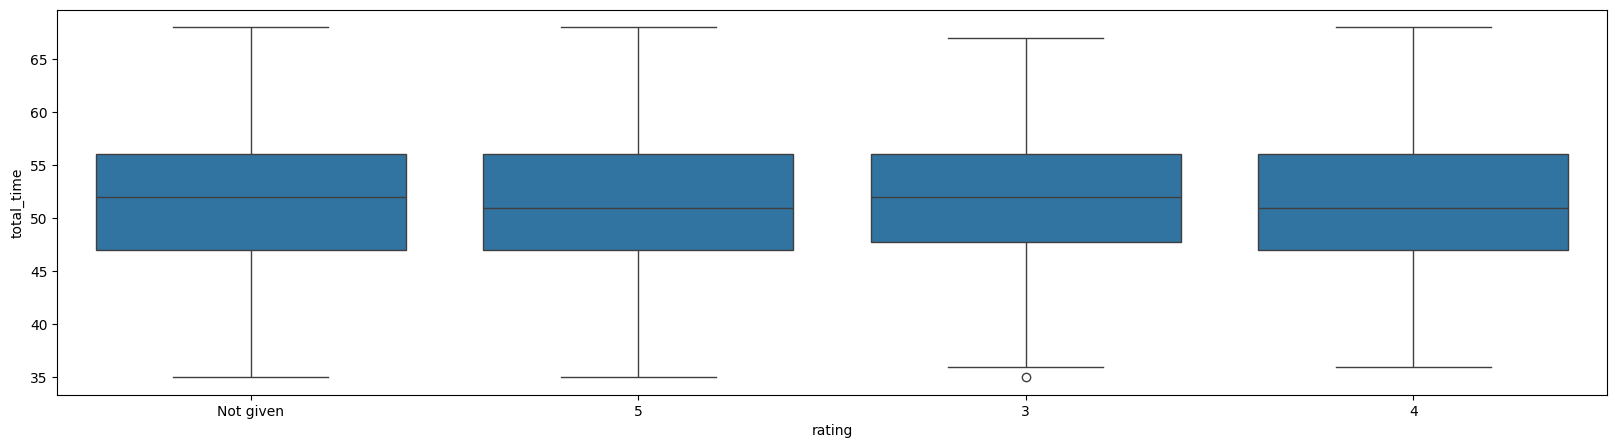

In [57]:
plt.figure(figsize = (20,5))
sns.boxplot(data = df, x = 'rating', y = 'total_time')



<Axes: xlabel='rating', ylabel='cost_of_the_order'>

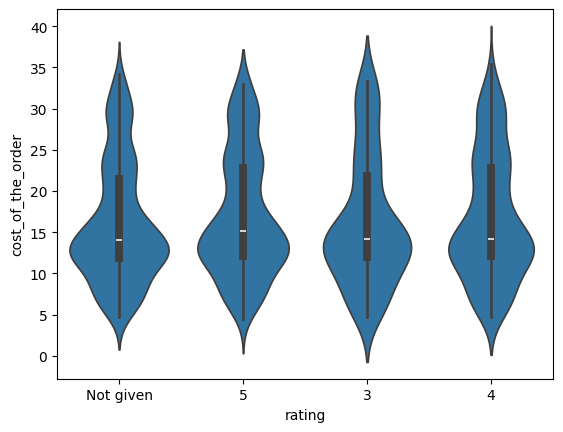

In [58]:
sns.violinplot(data = df, x = 'rating', y = 'cost_of_the_order')

<Axes: xlabel='cuisine_type', ylabel='rating'>

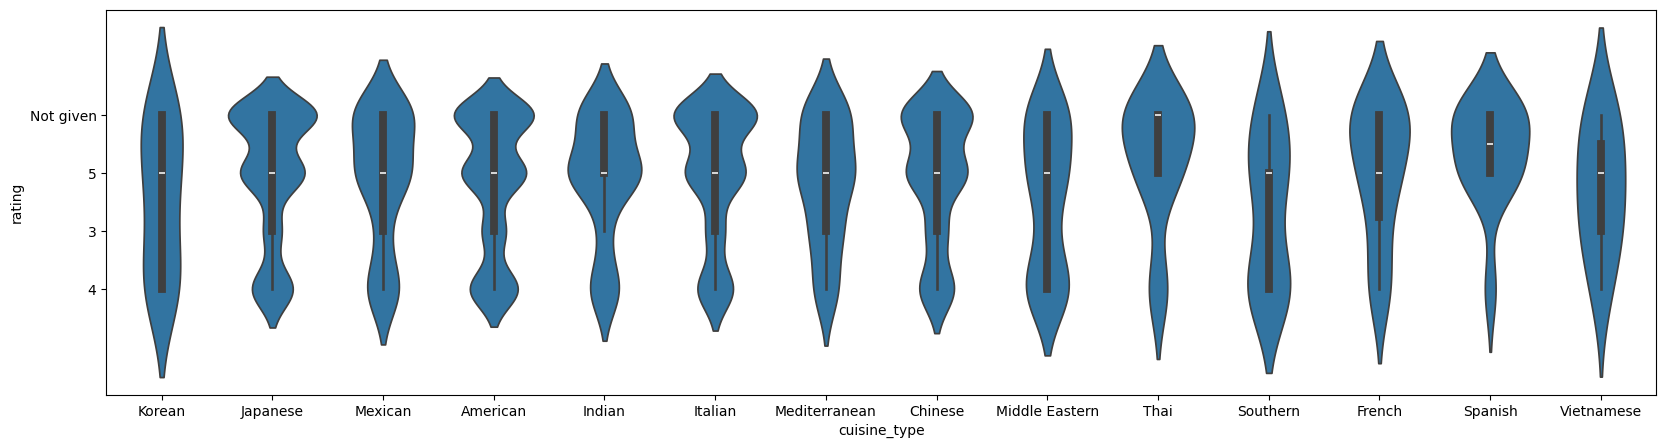

In [59]:
plt.figure(figsize = (20,5))
sns.violinplot(data = df, x = 'cuisine_type', y = 'rating')

<Axes: xlabel='cuisine_type', ylabel='cost_per_minute'>

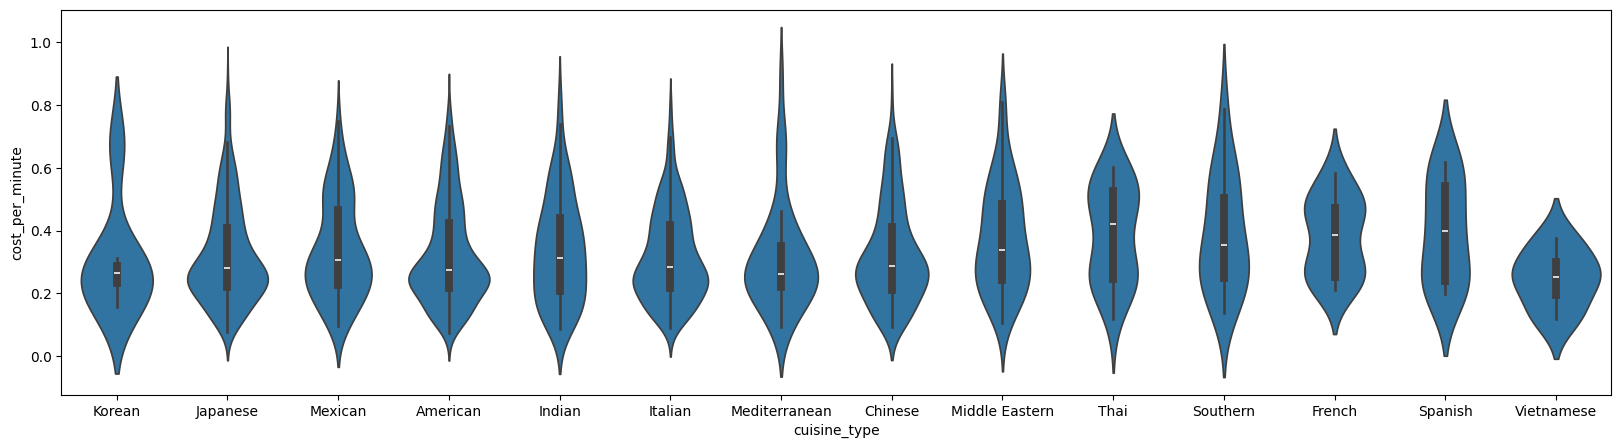

In [60]:
plt.figure(figsize = (20,5))
sns.violinplot(data = df, x = 'cuisine_type', y = 'cost_per_minute')

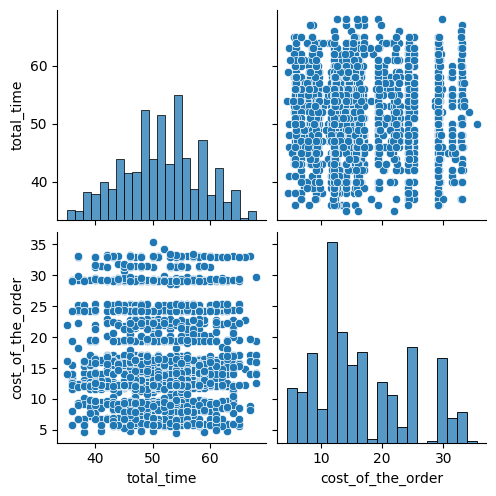

In [61]:
sns.pairplot(data=df[['total_time','cost_of_the_order']])

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [62]:
# Write the code here
rating = df[['rating', 'restaurant_name']].copy() #creating copy to not transform parent data
rating['rating'] = pd.to_numeric(rating['rating'], errors ='coerce') #turning ratings column into numeric values (initially strings)
temp = rating.groupby(['restaurant_name'], as_index = False).agg(['mean', 'sum']) #creating new dataframe that groups ratings in terms of sum and mean
eligeable = temp.loc[(temp['rating']['mean'] > 4) & (temp['rating']['sum'] > 50)] #locating which stores meet the criteria
eligeable
#


rating       
                                           mean    sum
restaurant_name                                       
Bareburger                             4.058824   69.0
Blue Ribbon Fried Chicken              4.328125  277.0
Blue Ribbon Sushi                      4.219178  308.0
Blue Ribbon Sushi Bar & Grill          4.590909  101.0
Blue Ribbon Sushi Izakaya              4.333333   78.0
Cafe Mogador                           4.153846   54.0
Chipotle Mexican Grill $1.99 Delivery  4.200000   63.0
Five Guys Burgers and Fries            4.555556   82.0
Han Dynasty                            4.434783  102.0
J. G. Melon                            4.416667   53.0
Jack's Wife Freda                      4.315789   82.0
Momoya                                 4.272727   94.0
Nobu Next Door                         4.347826  100.0
Parm                                   4.128205  161.0
RedFarm Broadway                       4.243902  174.0
RedFarm Hudson                         4.176471  142.0
Rubirosa                               4.125000   99.0
Shake Shack                            4.278195  569.0
Sushi of Gari 46                       4.235294   72.0
Sushi of Gari Tribeca                  4.615385   60.0
TAO                                    4.357143  122.0
Tamarind TriBeCa                       4.400000   88.0
The Meatball Shop                      4.511905  379.0
The Smile                              4.416667   53.0
ilili Restaurant                       4.153846   54.0

#### Observations:
Only 25 stores meet this criteria.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [63]:
# Write the code here
cost = df['cost_of_the_order'].copy()
revenue_25 = 0
revenue_15 = 0
for x in cost:
    if x > 20:
        revenue_25 += x * .25
    elif x > 5:
        revenue_15 += x * .15
revenue = revenue_25 + revenue_15
print('Precentage of revenue from > $20: ' + str(revenue_25/revenue * 100))
print('Total Revenue: ' + str(revenue))

Precentage of revenue from > $20: 59.82073050902622
Total Revenue: 6166.303000000006


In [64]:
df['money_makers'] = '5+'
df.loc[df['cost_of_the_order'] > 20, 'money_makers'] = '20+'
df.groupby(['cuisine_type'], as_index=False)['money_makers'].value_counts()
df['money_makers'].value_counts()

money_makers
5+     1343
20+     555
Name: count, dtype: int64

In [65]:
rev_5 = revenue_15 / 1343
rev_20 = revenue_25 / 555

print(rev_5)
print(rev_20)
print(rev_20 - rev_5)

1.8448067758749096
6.646355855855861
4.801549079980951


Eventhough the majority of sales is from $5 - 20 orders, the majority of revenue is made from orders > $20.

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [66]:
# Write the code here
total_time = df['food_preparation_time'] + df['delivery_time']
count = 0
for x in total_time:
    if x > 60:
        count += 1
over_60 = count / len(total_time) * 100
over_60

10.537407797681771

#### Observations:

10.5% of all orders take longer than 60 minutes to be prepared and delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [67]:
# Write the code here
df.groupby(['day_of_the_week'], as_index=False)['delivery_time'].mean()

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


#### Observations:
The weekday delivery times are on average 6 minutes longer than weekend delivery times.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  
The most popular choices are american, japnaese, and italian. There seems to be little correlation between feedback ratings and cost / time of delivery. Thai and southern food have a higher on average cost than other cuisines. It is difficult to get people to rate their meals. Weekday deliveries were on average higher than weekend deliveries. Could not find any strong correlation between data. 



### Recommendations:

*  Since Thai and French restaurants have higher on average cost, they should be advertised more to bring in higher profit margins. 
The majority of profit is made from 20+ orders, I would recommend adding a coupon that says save 10% on orders over 20 so that profit margins are still higher than 5-15 orders but enticing enough to get people to spend more. 

---